In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [7]:
df = pd.read_csv(r'C:\Users\opandey2\Desktop\Uber Request Data.csv')
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [8]:
df.shape

(6745, 6)

In [9]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [10]:
df.tail(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [11]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [12]:
df.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [13]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [14]:
df.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [15]:
#Changing datatype of the variables 'Request timestamp' and 'Drop timestamp'

df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [16]:
df.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [17]:
#Calculating the duration of each trip in minutes
df['trip_duration'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60


#Adding a new column 'is_completed' that indicates whether a trip is completed or not
df['is_completed'] = df['Status'].apply(lambda x: 1 if x == 'Trip Completed' else 0)



#Gropuing the data by date and calculating the number of completed trips and the mean of trips duration on each date.
completed_trips_by_date = df[df['is_completed'] == 1].groupby(pd.Grouper(key='Request timestamp', freq = '1D')).agg({'is_completed':'sum','trip_duration':'mean'})



In [18]:
#Find the date with the highesy number of completed trips and the mean of completed trip duration on that date
max_completed_trips_date = completed_trips_by_date['is_completed'].idxmax()

max_completed_trips = completed_trips_by_date['is_completed'].max()
max_trip_duration = completed_trips_by_date.loc[max_completed_trips_date, 'trip_duration']

mean_trip_duration = completed_trips_by_date.loc[max_completed_trips_date,'trip_duration']
print("The date with the most completed trips is:", max_completed_trips_date)

print("The number of completed trips on that date is:", max_completed_trips)

print("The mean of completed trip duration on that date is:", mean_trip_duration)

The date with the most completed trips is: 2016-11-07 00:00:00
The number of completed trips on that date is: 601
The mean of completed trip duration on that date is: 1372.5707154742097


In [19]:
#Grouping the data by hour and calculating the number of completed trips in each hour

completed_trips_by_hour = df[df['is_completed'] ==1].groupby(pd.Grouper(key = 'Request timestamp', freq = '1H'))['is_completed'].sum(numeric_only = True)

#Calculating the daily total of completed trips
completed_trips_by_day = completed_trips_by_hour.resample('D').sum(numeric_only = True)

print(completed_trips_by_day)



Request timestamp
2016-07-13    577
2016-07-14    530
2016-07-15    561
2016-07-16      0
2016-07-17      0
             ... 
2016-12-03      0
2016-12-04      0
2016-12-05      0
2016-12-06      0
2016-12-07    562
Freq: D, Name: is_completed, Length: 148, dtype: int64


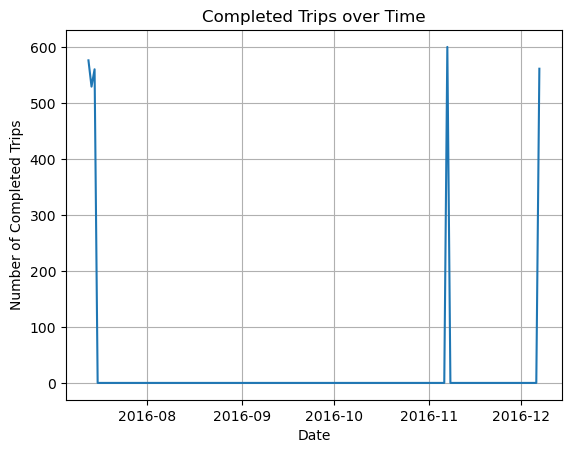

In [20]:
#Creating a line plot of the completed trips over time

sns.lineplot(x=completed_trips_by_day.index, y = completed_trips_by_day.values)
plt.xlabel('Date')
plt.ylabel('Number of Completed Trips')
plt.title('Completed Trips over Time')
plt.grid()
plt.show()

In [21]:
#Calculationg the duration of each trip in minute

df['trip_duration'] = (df['Drop timestamp'] - df ['Request timestamp']).dt.total_seconds() / 60

#Add a new column 'is_completed' that indicates weather a trip os completed or not

df['is_completed'] = df['Status'].apply(lambda x:1 if x == 'Trip Completed' else 0)

#Grouping the data by hour and calculating the number of completed trips in each hour
completed_trips_by_hour = df[df['is_completed'] == 1].groupby(pd.Grouper(key='Request timestamp', freq = '1H')).sum(numeric_only = True)['is_completed']

#Finding the highest number of completed trips and the date when it occurred

max_completed_trips = completed_trips_by_hour.max()
max_completed_trips_date = completed_trips_by_hour.idxmax()

print("The highest number of completed trips within a 24-hrs period is:", max_completed_trips)

print("The date when the highest number of completed trips occurred is:", max_completed_trips_date)

The highest number of completed trips within a 24-hrs period is: 47
The date when the highest number of completed trips occurred is: 2016-11-07 09:00:00


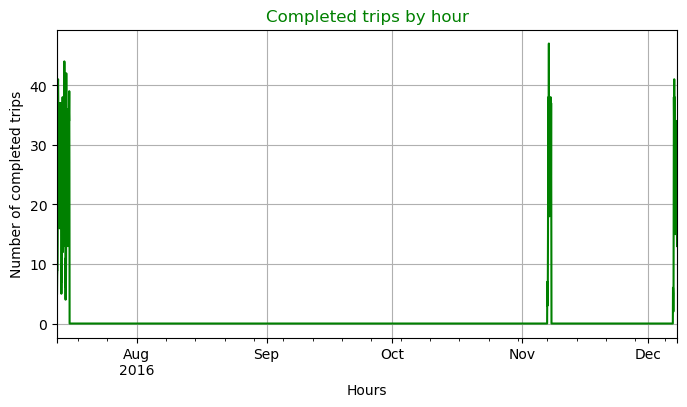

In [22]:
#Plotting the number of completed trips bt hour

completed_trips_by_hour.plot(kind='line', figsize = (8,4), color = 'g')

#Setting the plot title and axis label

plt.title('Completed trips by hour', color = 'g')
plt.xlabel('Hours')
plt.ylabel('Number of completed trips')
plt.grid()

plt.show()

In [23]:
#Filtering the DataFrame to include only completed trips during the 24-hr period

start_time = max_completed_trips_date
end_time = start_time + pd.Timedelta(hours=24)
completed_trips_period = df[(df['Request timestamp'] < end_time)]

#Grouping the data by driver ID and calculating the sum of completed trips for each driver
completed_trips_by_driver = completed_trips_period.groupby('Driver id')['is_completed'].sum(numeric_only = True)

#Sorting the results in decending order and selecting the top three drivers

top_drivers = completed_trips_by_driver.sort_values(ascending = False).head(3)

print("Top drivers with the highest number of completed trips during the 24-hour period when the highest number of completed trips occured:")
print(top_drivers)

Top drivers with the highest number of completed trips during the 24-hour period when the highest number of completed trips occured:
Driver id
24.0    14
22.0    14
70.0    13
Name: is_completed, dtype: int64


In [24]:
print(completed_trips_by_driver)

Driver id
1.0      7
2.0      7
3.0      7
4.0      7
5.0      8
        ..
296.0    8
297.0    9
298.0    9
299.0    6
300.0    5
Name: is_completed, Length: 300, dtype: int64


Insights:
    
These are the top drivers who completed the highest number of trips during a 24-hour period:

-Driver id 67 completed 4 trips
-Driver id 296 completed 4 trips
-|Driver id 178 completed 4 trips



In [25]:
#EXtracting the hour from requested timestamp
df["Request hour"] = df["Request timestamp"].dt.hour
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,trip_duration,is_completed,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,69.000000,1,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,50.000000,1,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,41.000000,1,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,55.000000,1,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.516667,1,8


In [26]:
#Grouping the data by hour and couting the number of requests in each hour

requests_by_hour = df.groupby("Request hour")['Request id'].count()
requests_by_hour



Request hour
0      99
1      85
2      99
3      92
4     203
5     445
6     398
7     406
8     423
9     431
10    243
11    171
12    184
13    160
14    136
15    171
16    159
17    418
18    510
19    473
20    492
21    449
22    304
23    194
Name: Request id, dtype: int64

In [27]:
#Finding the hour with the most requests
max_requests_hour = requests_by_hour.idxmax()
print('THe hour with the most requests during the two week period is:', max_requests_hour)

THe hour with the most requests during the two week period is: 18


In [28]:
#Sorting the hpurs in ascending order

requests_by_hour = requests_by_hour.sort_index()

requests_by_hour

Request hour
0      99
1      85
2      99
3      92
4     203
5     445
6     398
7     406
8     423
9     431
10    243
11    171
12    184
13    160
14    136
15    171
16    159
17    418
18    510
19    473
20    492
21    449
22    304
23    194
Name: Request id, dtype: int64

In [29]:
#Selecting the top 3 frequencies

top_3 = requests_by_hour.sort_values(ascending = False).head(3)
top_3

Request hour
18    510
20    492
19    473
Name: Request id, dtype: int64

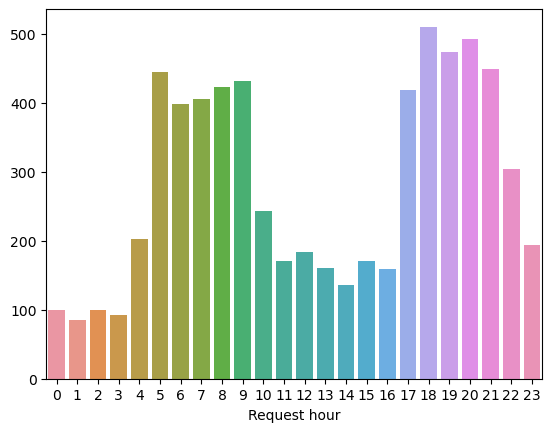

In [30]:
#Creating a var plot og the requests by hour
ax = sns.barplot(x=requests_by_hour.index, y=requests_by_hour.values)

In [33]:
#Looping through the top 3 frequencies and adding a text label to the corresponding bar

for hour, freq in top_3.items():
    plt.text(hour, freq, str(freq), ha='center', va='bottom', color = "Green")
    



ValueError: Image size of 9985x188553 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [34]:
#Creating a new column for the day of the week

df['Day of Week'] = df['Request timestamp'].dt.day_name()

In [35]:
#Getting the value counts for the day of week column
df['Day of Week'].value_counts()

Wednesday    2644
Friday       1381
Monday       1367
Thursday     1353
Name: Day of Week, dtype: int64

In [39]:
#Creating a pie chart of the value counts
plt.pie(day_counts.values, labels=day_counts.index, autopct = '%1.1f%%')

#Setting the title of the graph
plt.title('Day of Week Value Counts')
plt.show()

NameError: name 'day_counts' is not defined

The peak number of the requests on a perticular day:
    Wednesday with 2644 requests
    Friday with 1381 requests
    Monday with 1367 requests
    Thursday with 1353 requests